<a href="https://colab.research.google.com/github/kimx1201/covid19_safe_route/blob/main/%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%8F%AC%ED%84%B8_%EC%BD%94%EB%A1%9C%EB%82%9819_%ED%99%95%EC%A7%84%EC%9E%90%EC%88%98_%EC%B6%94%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 파이썬 X 코로나19 확진자수
- 공공데이터포털 보건복지부_코로나19 감염_현황
- https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15043376


```
공공데이터포털(data.go.kr)의 코로나19 데이터 설명
```

한글명 | 코드
-------- | ----------
확진자 수	| DECIDE_CNT 
격리해제 수	| CLEAR_CNT 
검사진행 수	| EXAM_CNT 
사망자 수	| DEATH_CNT 
치료중 환자 수 | CARE_CNT 
결과 음성 수	| RESUTL_NEG_CNT 
누적 검사 수	| ACC_EXAM_CNT 
누적 검사 완료 수	| ACC_EXAM_COMP_CNT 
누적 환진률	| ACC_DEF_RATE 
등록일시분초 |	CREATE_DT 
수정일시분초	| UPDATE_DT

- requests : 데이터 받아오기
- xmltodict : XML 데이터를 DataFrame으로 전환
- DataFrame.diff() : 일별 누진 데이터를 일일 데이터로 변환


In [ ]:
#pip install xmltodict

In [ ]:
# -*- coding: utf-8 -*-
import requests
import xmltodict
import time
import pandas as pd 

**url로 데이터 받아오기**

In [ ]:
url_base = "http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson"
url_serviceKey = "uR4%2FB3Ln1d%2FHcZEuv1bHIrQi0MVc80eZX%2FhzR%2Fuqqi7469%2Bz%2BJ9SbS52J0%2FjoLxi4q0i9TfyppoY3nZf53PiXA%3D%3D"
url_pages = "1000" #페이지당열갯수
url_start_date = "20200101" #시작날짜
url_end_date = "20210531" #끝날짜
url = url_base + "?serviceKey=" + url_serviceKey + "&pageNo=1&numOfRows=" + url_pages + "&startCreateDt="+ url_start_date + "&endCreateDt=" + url_end_date

In [ ]:
req = requests.get(url).content

**XML to DataFrame**

In [ ]:
xmlObject = xmltodict.parse(req)
dict_data = xmlObject['response']['body']['items']['item']

In [ ]:
df = pd.DataFrame(dict_data)

In [ ]:
df.head()

,accDefRate,accExamCnt,accExamCompCnt,careCnt,clearCnt,createDt,deathCnt,decideCnt,examCnt,resutlNegCnt,seq,stateDt,stateTime,updateDt
0,1.4568360166,9761158,9633205,7558,130823,2021-05-31 09:34:29.254,1959,140340,127953,9492865,528,20210531,00:00,null
1,1.4541964496,9747614,9621121,7572,130381,2021-05-30 09:24:39.384,1957,139910,126493,9481211,527,20210530,00:00,null
2,1.4509249463,9733591,9609801,7741,129739,2021-05-29 09:45:26.765,1951,139431,123790,9470370,526,20210529,00:00,null
3,1.4499377008,9702456,9579584,8193,128759,2021-05-28 09:34:29.553,1946,138898,122872,9440686,525,20210528,00:00,2021-05-29 09:47:35.466
4,1.4493399059,9665693,9543034,8188,128180,2021-05-27 09:39:43.099,1943,138311,122659,9404723,524,20210527,00:00,null


In [ ]:
# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   accDefRate      456 non-null    object
 1   accExamCnt      456 non-null    object
 2   accExamCompCnt  456 non-null    object
 3   careCnt         455 non-null    object
 4   clearCnt        487 non-null    object
 5   createDt        487 non-null    object
 6   deathCnt        487 non-null    object
 7   decideCnt       487 non-null    object
 8   examCnt         487 non-null    object
 9   resutlNegCnt    456 non-null    object
 10  seq             487 non-null    object
 11  stateDt         487 non-null    object
 12  stateTime       487 non-null    object
 13  updateDt        487 non-null    object
dtypes: object(14)
memory usage: 53.4+ KB


In [ ]:
df = df.astype({'decideCnt' : 'int', 'examCnt' : 'int', 'deathCnt' : 'int'})

In [ ]:
df = df.drop_duplicates(['stateDt']) # 중복제거: 하루에 2회 이상 중복 확진자 발표가 있을 경우 마지막 발표한 것으로 대체 

In [ ]:
df.head()

,accDefRate,accExamCnt,accExamCompCnt,careCnt,clearCnt,createDt,deathCnt,decideCnt,examCnt,resutlNegCnt,seq,stateDt,stateTime,updateDt
0,1.4568360166,9761158,9633205,7558,130823,2021-05-31 09:34:29.254,1959,140340,127953,9492865,528,20210531,00:00,null
1,1.4541964496,9747614,9621121,7572,130381,2021-05-30 09:24:39.384,1957,139910,126493,9481211,527,20210530,00:00,null
2,1.4509249463,9733591,9609801,7741,129739,2021-05-29 09:45:26.765,1951,139431,123790,9470370,526,20210529,00:00,null
3,1.4499377008,9702456,9579584,8193,128759,2021-05-28 09:34:29.553,1946,138898,122872,9440686,525,20210528,00:00,2021-05-29 09:47:35.466
4,1.4493399059,9665693,9543034,8188,128180,2021-05-27 09:39:43.099,1943,138311,122659,9404723,524,20210527,00:00,null


In [ ]:
df['date']=df['stateDt']
df['date'] = pd.to_datetime(df['date']) #시계열지정
df.set_index('date')

,accDefRate,accExamCnt,accExamCompCnt,careCnt,clearCnt,createDt,deathCnt,decideCnt,examCnt,resutlNegCnt,seq,stateDt,stateTime,updateDt
date,,,,,,,,,,,,,,
2021-05-31,1.4568360166,9761158,9633205,7558,130823,2021-05-31 09:34:29.254,1959,140340,127953,9492865,528,20210531,00:00,null
2021-05-30,1.4541964496,9747614,9621121,7572,130381,2021-05-30 09:24:39.384,1957,139910,126493,9481211,527,20210530,00:00,null
2021-05-29,1.4509249463,9733591,9609801,7741,129739,2021-05-29 09:45:26.765,1951,139431,123790,9470370,526,20210529,00:00,null
2021-05-28,1.4499377008,9702456,9579584,8193,128759,2021-05-28 09:34:29.553,1946,138898,122872,9440686,525,20210528,00:00,2021-05-29 09:47:35.466
2021-05-27,1.4493399059,9665693,9543034,8188,128180,2021-05-27 09:39:43.099,1943,138311,122659,9404723,524,20210527,00:00,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-04,NaN,NaN,NaN,NaN,0,2020-02-03 21:26:59.59,0,0,0,NaN,4,20200204,00:00,2020-02-03 21:26:59.59
2020-02-03,NaN,NaN,NaN,NaN,0,2020-02-03 14:41:17.17,0,15,0,NaN,3,20200203,09:00,2020-02-03 14:41:17.17
2020-02-02,NaN,NaN,NaN,NaN,2,2020-02-03 12:22:49.49,2,2,2,NaN,2,20200202,09:00,2020-02-03 12:22:49.49


**DataFrame.diff()**

In [ ]:
df_2 = df[['date','decideCnt','deathCnt']]

In [ ]:
df_2 = df_2.sort_values(by='date') #diff()를 사용하기 위해서 날짜로 오름차순 정렬

In [ ]:
df_2['daily_decideCnt'] = df_2['decideCnt'].diff()

In [ ]:
df_2.head(5)

,date,decideCnt,deathCnt,daily_decideCnt
486,2020-01-01,0,0,NaN
485,2020-02-01,0,0,0.0
484,2020-02-02,2,2,2.0
483,2020-02-03,15,0,13.0
482,2020-02-04,0,0,-15.0


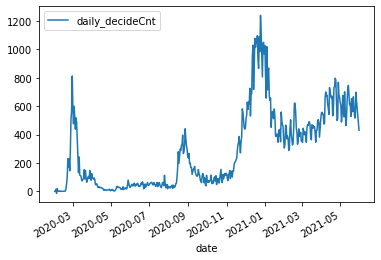

In [ ]:
df_2.plot('date', ['daily_decideCnt'])

In [ ]:
df_2.to_csv("df2")

### 요약
- requests : 데이터 받아오기
- xmltodict : XML 데이터를 DataFrame으로 전환
- DataFrame.diff() : 일별 누진 데이터를 일일 데이터로 변환

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install selenium

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import folium
from folium import plugins
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from IPython.display import display, Image
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException
import json
import time
warnings.filterwarnings(action='ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline
plt.style.use('seaborn')

In [ ]:
#그래프 한글 출력을 위한 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install git+https://github.com/python-visualization/branca.git@master

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded
  Cloning https://github.com/python-visual

In [ ]:
pd.set_option('max_columns', 24,'max_rows', 20) 
plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic') 
plt.rc('axes', unicode_minus=False)

In [ ]:
time = pd.read_csv("/content/df2")

In [ ]:
time

,Unnamed: 0,date,decideCnt,deathCnt,daily_decideCnt
0,486,2020-01-01,0,0,NaN
1,485,2020-02-01,0,0,0.0
2,484,2020-02-02,2,2,2.0
3,483,2020-02-03,15,0,13.0
4,482,2020-02-04,0,0,-15.0
...,...,...,...,...,...
482,4,2021-05-27,138311,1943,637.0
483,3,2021-05-28,138898,1946,587.0
484,2,2021-05-29,139431,1951,533.0
485,1,2021-05-30,139910,1957,479.0


In [38]:
fig = go.Figure()
fig.add_trace(go.Line(x=time['date'], y = time['deathCnt'], name = "일자별 누적 확진자 수(전국)", marker_color='#33AFFF', yaxis="y"))
fig.add_trace(go.Bar(x=time['date'], y = time['daily_decideCnt'], name = "일자별 확진자 수(전국)", marker_color='#E80BCD', yaxis="y2"))
fig.update_layout(shapes=[dict(fillcolor="rgba(211, 211, 211, 0.3)",line={"width": 0}, type="rect",x0="2020-12-14",x1="2021-01-05",xref="x",y0=0,y1=0.95,yref="paper")])
fig.update_layout(xaxis=dict(rangeslider=dict(autorange=True, range=["2020-01-20", "2020-06-30"],visible=True),type="date"),
                  yaxis=dict(anchor="x",autorange=True,domain=[0, 0.5],linecolor="#33AFFF",mirror=True,range=[-60.0858369099, 28.4406294707],showline=True,side="right",
                             tickfont={"color": "#33AFFF"},tickmode="auto",ticks="",titlefont={"color": "#33AFFF"},type="linear",zeroline=False),
                  yaxis2=dict(anchor="x",autorange=True,domain=[0.5, 0.95],linecolor="#E80BCD",mirror=True,range=[29.3787777032, 100.621222297],showline=True,side="right",
                             tickfont={"color": "#E80BCD"},tickmode="auto",ticks="",titlefont={"color": "#E80BCD"},type="linear",zeroline=False))
fig.update_layout(dragmode="zoom", hovermode="x", height=700, template="plotly_dark", title_text = "일자별 코로나 확진 현황", margin=dict(t=100, b=100))
fig.show()

코로나는 2020년 2월에 확진자 수가 급증하다 하락세를 보였고 이후 줄어들다 이태원 집담 감염 사태가 발생했던 5월을 기점으로 8월에 확진자수가 증가하였고 12월에 가장 많은 확진자수가 집계됐다. 그 이후 2021년에 상반기에도 일별 평균 300~500명의 확진자수를 기록하고 있다. 